In [1]:
import pandas as pd
import numpy as np

In [2]:
TRAIN_FILE = './dataset/logins.json'

In [3]:
df_train = pd.read_json(TRAIN_FILE)
print(df_train.head())

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21


In [4]:
df_train['date'] = df_train.login_time.map(lambda x:x.date())
df_train['day_name'] = df_train.login_time.map(lambda x:x.day_name())
df_train['dayofweek'] = df_train.login_time.map(lambda x:x.dayofweek)
df_train['hour'] = df_train.login_time.map(lambda x:x.hour)
df_train['minute_category'] = df_train.login_time.map(lambda x:x.minute//15)

In [5]:
df_train.head()

,login_time,date,day_name,dayofweek,hour,minute_category
0,1970-01-01 20:13:18,1970-01-01,Thursday,3,20,0
1,1970-01-01 20:16:10,1970-01-01,Thursday,3,20,1
2,1970-01-01 20:16:37,1970-01-01,Thursday,3,20,1
3,1970-01-01 20:16:36,1970-01-01,Thursday,3,20,1
4,1970-01-01 20:26:21,1970-01-01,Thursday,3,20,1
5,1970-01-01 20:21:41,1970-01-01,Thursday,3,20,1
6,1970-01-01 20:12:16,1970-01-01,Thursday,3,20,0
7,1970-01-01 20:35:47,1970-01-01,Thursday,3,20,2
8,1970-01-01 20:35:38,1970-01-01,Thursday,3,20,2
9,1970-01-01 20:47:52,1970-01-01,Thursday,3,20,3


In [6]:
df_count = df_train.groupby(["date", "hour", "minute_category"])['login_time'].count().reset_index(name="count")
print(df_count.head())

         date  hour  minute_category  count
0  1970-01-01    20                0      2
1  1970-01-01    20                1      6
2  1970-01-01    20                2      9
3  1970-01-01    20                3      7
4  1970-01-01    21                0      1


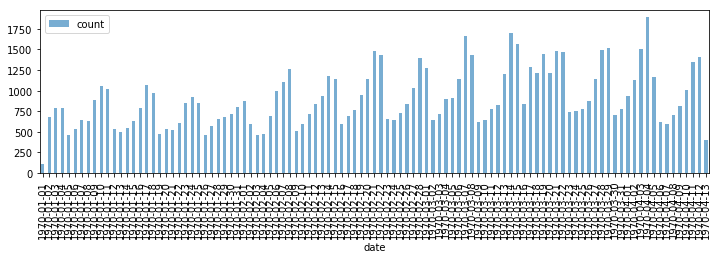

In [10]:
df_daily = df_train.groupby(["date"])['login_time'].count().reset_index(name="count")
df_daily.plot.bar(x='date', y='count', alpha=0.6, figsize=(12,3))

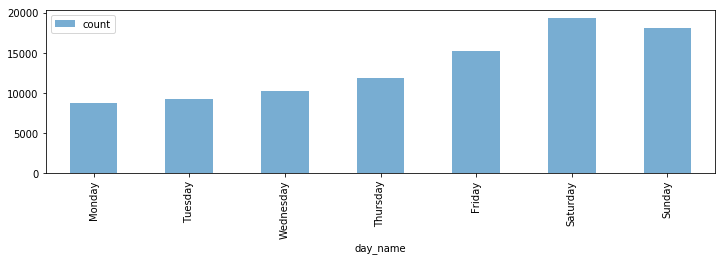

In [8]:
df_dayofweek = df_train.groupby(["dayofweek", "day_name"])['login_time'].count().reset_index(name="count")
df_dayofweek.plot.bar(x='day_name', y='count', alpha=0.6, figsize=(12,3))

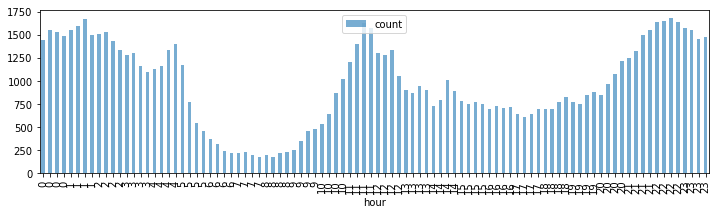

In [9]:
df_hour = df_train.groupby(["hour","minute_category"])['login_time'].count().reset_index(name="count")
df_hour.plot.bar(x='hour', y='count', alpha=0.6, figsize=(12,3))